In [1]:
from study_help import load_studies
from study_visualize import *
from study import Study

from pathlib import Path

In [2]:
studies = load_studies(Path.cwd().parent / 'study_data')

In [3]:
for s in studies:
    s.print_explanations()

Study 251570_ours
Response #1
Question 1: dark wings
Question 2: unclear if wings are dark or not
Mental Model: color of wings is the easiest feature for distinguishing them
Response #2
Mental Model: 
Response #3
Question 1: Beak, white/gray feathers
Question 2: White/gray feathers
Question 3: Beak, white gray feathers
Question 4: white gray feathers
Question 5: white gray feathers
Question 6: Beak, white gray feathers
Question 7: brownish feathers
Question 8: white gray feathers
Question 9: Beak, white gray feathers
Question 10: Beak, white gray feathers
Mental Model: Alpha = orange tipped beak with white/gray feathers. Beta = brown feathers
Response #4
Question 1: Wings
Question 2: Wings
Question 4: White color
Mental Model: The birds in class Alpha are all white, while the ones in class Beta have some brown feathers on their wings
Response #5
Question 1: Dark mantle 
Question 2: Lighter mantle, general shape
Question 3: Bull, dark mantle and shape
Question 4: Overall shape of bird, 

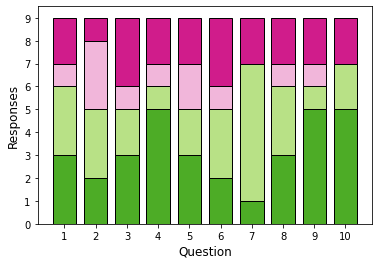

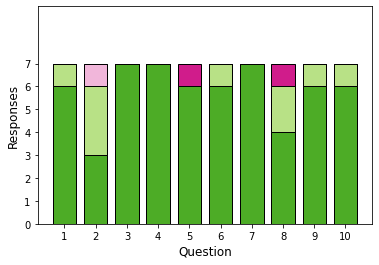

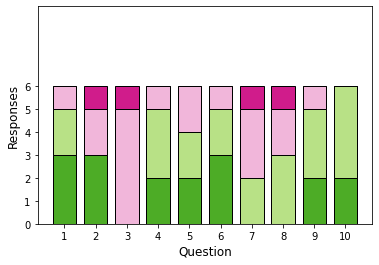

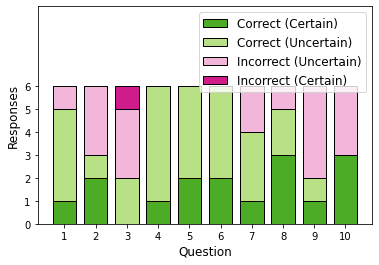

In [4]:
max_count = max([len(s.responses) for s in studies])
for i, s in enumerate(studies):
    visualize_accuracy(s, max_count=max_count, legend="upper right" if i == 3 else None)

In [5]:
for s in studies:
    count_answers(s)
    count_answers(s, "(wing|mantle|feather)+")
    count_answers(s, "(wing|color|colour)+")  
    count_answers(s, "(wing|color|colour|feather)+")  

Study 251570_ours has 8 matches for query \S.
Study 251570_ours has 8 matches for query (wing|mantle|feather)+.
Study 251570_ours has 6 matches for query (wing|color|colour)+.
Study 251570_ours has 7 matches for query (wing|color|colour|feather)+.
Study 251570_vandenhende has 6 matches for query \S.
Study 251570_vandenhende has 6 matches for query (wing|mantle|feather)+.
Study 251570_vandenhende has 5 matches for query (wing|color|colour)+.
Study 251570_vandenhende has 6 matches for query (wing|color|colour|feather)+.
Study 433137_ours has 6 matches for query \S.
Study 433137_ours has 4 matches for query (wing|mantle|feather)+.
Study 433137_ours has 1 matches for query (wing|color|colour)+.
Study 433137_ours has 5 matches for query (wing|color|colour|feather)+.
Study 433137_vandenhende has 5 matches for query \S.
Study 433137_vandenhende has 0 matches for query (wing|mantle|feather)+.
Study 433137_vandenhende has 4 matches for query (wing|color|colour)+.
Study 433137_vandenhende has 4 

In [6]:
for s in studies:
    print(s.name)
    compare_answers(s.responses)

251570_ours
wing appeared 5 time(s).
white appeared 4 time(s).
feather appeared 3 time(s).
color appeared 3 time(s).
dark appeared 2 time(s).
bill appeared 2 time(s).
251570_vandenhende
wing appeared 5 time(s).
color appeared 3 time(s).
bill appeared 3 time(s).
gray appeared 3 time(s).
feathers appeared 2 time(s).
white appeared 2 time(s).
spots appeared 2 time(s).
tubenose appeared 2 time(s).
shape appeared 2 time(s).
body appeared 2 time(s).
legs appeared 2 time(s).
433137_ours
eye appeared 5 time(s).
feather appeared 4 time(s).
beak appeared 2 time(s).
dark appeared 2 time(s).
pattern appeared 2 time(s).
stripes appeared 2 time(s).
433137_vandenhende
color appeared 4 time(s).
eye appeared 3 time(s).
head appeared 3 time(s).
around appeared 3 time(s).
stripe appeared 2 time(s).


Study 251570_ours received 9 responses.
Study 251570_vandenhende received 7 responses.
Study 433137_ours received 6 responses.
Study 433137_vandenhende received 6 responses.
Total responses received: 28
{'University E-mail': array([9., 6., 1., 0., 0.]), 'Bird Forums': array([0., 2., 1., 4., 2.]), 'Other': array([1., 1., 1., 0., 0.])}


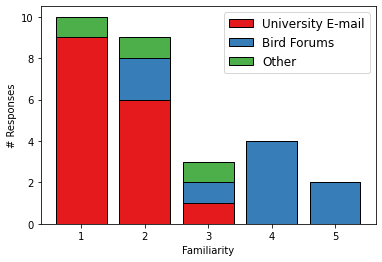

In [7]:
visualize_familiarity_count(studies)

In [8]:
for s in studies:
    print(f"Average familiarity for study {s.name}: {np.average([r.familiarity for r in s.responses])}")
    print(f"Fraction of certain answers for {s.name}: {np.count_nonzero([[abs(a) == 1 for a in r.main_testing] for r in s.responses]) / np.count_nonzero([[a for a in r.main_testing] for r in s.responses])}")

Average familiarity for study 251570_ours: 2.4444444444444446
Fraction of certain answers for 251570_ours: 0.5888888888888889
Average familiarity for study 251570_vandenhende: 2.7142857142857144
Fraction of certain answers for 251570_vandenhende: 0.8571428571428571
Average familiarity for study 433137_ours: 1.6666666666666667
Fraction of certain answers for 433137_ours: 0.35
Average familiarity for study 433137_vandenhende: 2.0
Fraction of certain answers for 433137_vandenhende: 0.2833333333333333


In [9]:
for s in studies:
    s.evaluate()

Average accuracy for study 251570_ours is 0.6444444444444445
Average accuracy for study 251570_vandenhende is 0.9571428571428573
Average accuracy for study 433137_ours is 0.6333333333333333
Average accuracy for study 433137_vandenhende is 0.7000000000000001


In [10]:
for s in studies:    
    s.create_valid_responses().evaluate()

Average accuracy for study 251570_ours (Valid Intro) is 0.6857142857142857
Average accuracy for study 251570_vandenhende (Valid Intro) is 0.96
Average accuracy for study 433137_ours (Valid Intro) is 0.5750000000000001
Average accuracy for study 433137_vandenhende (Valid Intro) is 0.725


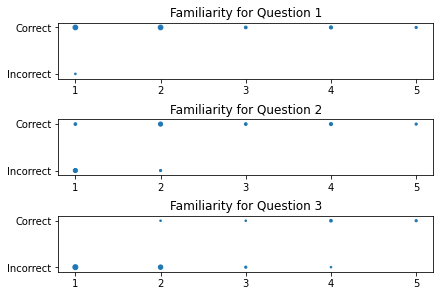

In [11]:
visualize_familiarity_correlation(studies)

[[[9, 9, 3, 4, 2], [1, 0, 0, 0, 0]], [[3, 7, 3, 4, 2], [7, 2, 0, 0, 0]], [[0, 1, 1, 3, 2], [10, 8, 2, 1, 0]]]


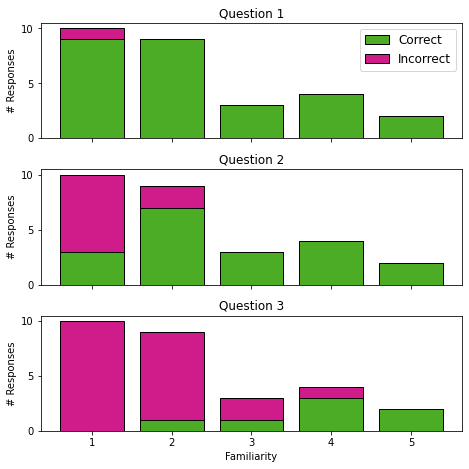

In [12]:
visualize_familiarity_correlation_bar(studies)

[[16, 5, 0, 1, 10], [9, 14, 0, 3, 0], [1, 2, 0, 8, 0], [4, 9, 0, 8, 0]]
Person correlation is -0.27765792519734406, pvalue = 0.4694503894026895


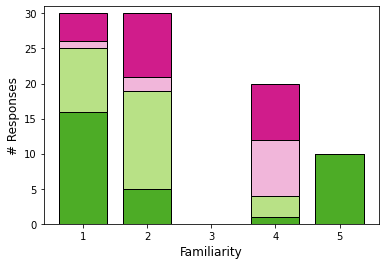

[[8, 18, 12, 20, 0], [1, 2, 6, 0, 0], [0, 0, 1, 0, 0], [1, 0, 1, 0, 0]]
Person correlation is 0.3202563076101743, pvalue = 0.4837628937195335


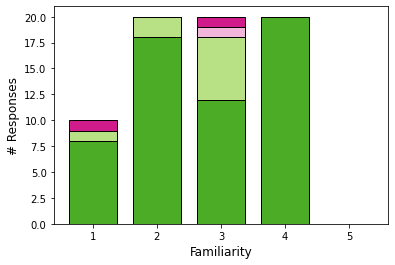

[[10, 1, 6, 0, 0], [13, 6, 2, 0, 0], [5, 12, 1, 0, 0], [2, 1, 1, 0, 0]]
Person correlation is -0.25391668753850405, pvalue = 0.627310440856314


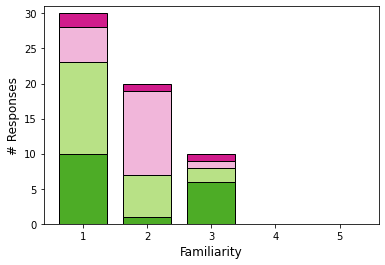

[[6, 2, 0, 0, 8], [13, 11, 0, 0, 2], [10, 7, 0, 0, 0], [1, 0, 0, 0, 0]]
Person correlation is 0.9166666666666669, pvalue = 0.010127314814814771


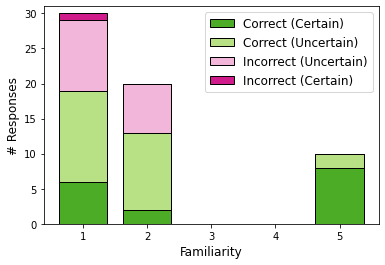

In [13]:
for i, s in enumerate(studies):
    visualize_familiarity_accuracy(s, legend="upper right" if i == 3 else None)

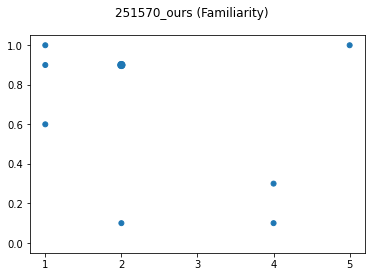

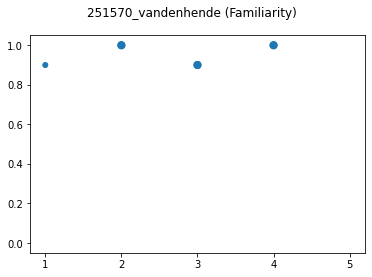

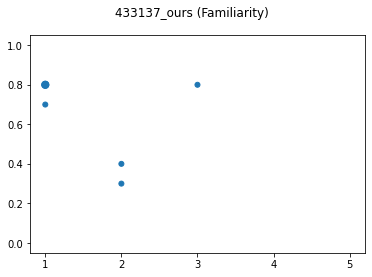

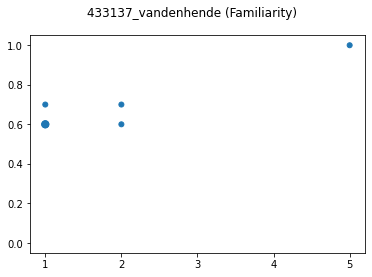

In [14]:
for s in studies:
    visualize_familiarity(s)

Number of valid responses: 7 out of 9
251570_ours (Accuracy)


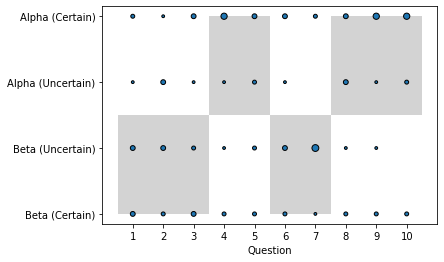

251570_ours (Valid Intro) (Accuracy)


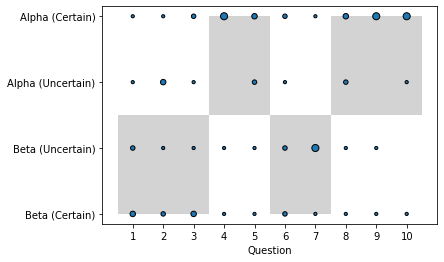

Number of valid responses: 5 out of 7
251570_vandenhende (Accuracy)


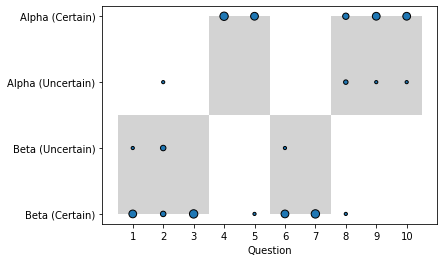

251570_vandenhende (Valid Intro) (Accuracy)


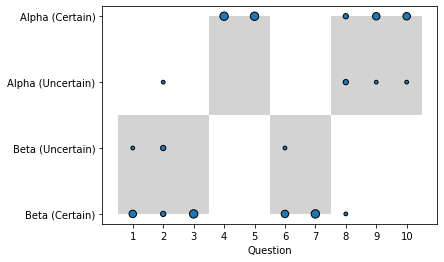

Number of valid responses: 4 out of 6
433137_ours (Accuracy)


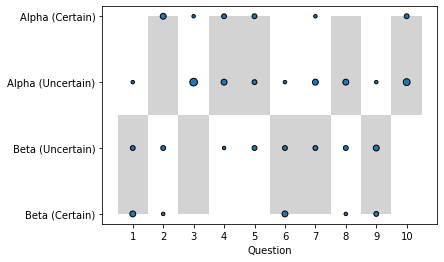

433137_ours (Valid Intro) (Accuracy)


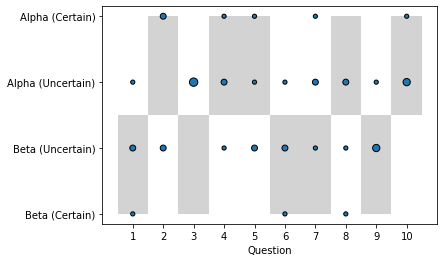

Number of valid responses: 4 out of 6
433137_vandenhende (Accuracy)


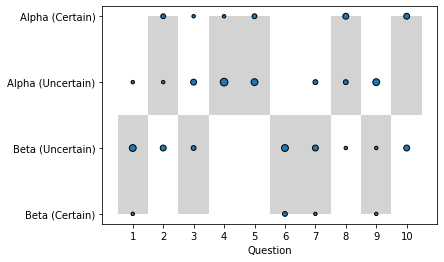

433137_vandenhende (Valid Intro) (Accuracy)


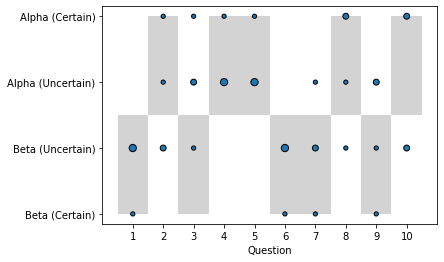

In [15]:
for s in studies:
    visualize_main_results(s, show_individual=False)